### General equation

We modify from Lotka-Volterra model, adding the decay rate.


$$[\dot {m_1}]= a[m_1] - b[m_1] \cdot [Med]$$ 

$$[\dot {AHL}]= k_1[\dot {m_1}] - \lambda_1[AHL]$$ 

$$[\dot {m_2}]= c[m_2]\cdot [AHL]-d[m_2]$$ 

$$[\dot {Med}] = k_2[\dot {m_2}] - \lambda_2[Med]$$ 
 
with constraint 

$$m_1 < m_t ,\ k_1= 0$$

In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import math

# y: used to iterated
# t: interaval array
# a,b,c,d,lm1,lm2,k1,k2: params 
def lotVol(y,t,a,b,c,d,lm1,lm2,k1,k2,mt):
    m1,ahl,m2,med = y

    if m1<mt: k1=0
    if ahl<0: ahl=0 
    if med<0: med=0 
    if m2<0: m2=0

    dm1_dt = a*m1 - b*m1*med
    dahl_dt = k1*dm1_dt - lm1*ahl
    dm2_dt = c*m2*ahl - d*m2
    dmed_dt = k2*dm2_dt - lm2*med

    dydt = [ dm1_dt, dahl_dt, dm2_dt, dmed_dt ]

    return dydt

In [3]:
# initial condition
vibrio_0 = 1
ahl_0 = 0
ecoli_0 = 1
nisin_0 = 0

# parameters 
Vibrio_GrothRate = 0.1
Ahl_Vibrio_Ratio = 1
Ahl_DecayRate = 0
Ahl_Secrete_Threshod = 1

Ecoli_GrothRate = 0.1
Nsin_Ecoli_Ratio = 1
Nisin_DecayRate = 0

Nisin_Vibrio_Binding_Strength = 0.05
Ahl_Ecoli_Binding_Strength = 0.5

# time interval
t = np.arange(0,100,0.1)


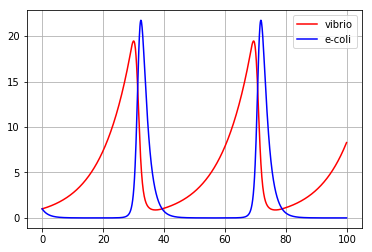

In [4]:
# load data
y0 = [vibrio_0, ahl_0, ecoli_0, nisin_0]
params = (
    Vibrio_GrothRate, 
    Nisin_Vibrio_Binding_Strength, 
    Ecoli_GrothRate, 
    Ahl_Ecoli_Binding_Strength,
    Ahl_DecayRate, 
    Nisin_DecayRate,
    Ahl_Vibrio_Ratio,
    Nsin_Ecoli_Ratio,
    Ahl_Secrete_Threshod)


sol = odeint(lotVol,y0,t,args=params)
plt.plot(t, sol[:,0], 'r', label='vibrio')
plt.plot(t, sol[:,2], 'b', label='e-coli')
plt.legend(loc='best')
plt.grid()
plt.show()
